In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv('Global-Superstore.csv',encoding = 'unicode_escape')

In [3]:
df.shape

(51290, 24)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
# Fill NaN values with 0 before converting to integer, if we are getting blanks then fillna(0) will replace with 0 and fix it.
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)
df['Sales'] = df['Sales'].fillna(0).astype(int)
df['Shipping Cost'] = df['Shipping Cost'].fillna(0).astype(int)
df['Profit'] = df['Profit'].fillna(0).astype(int)

# Converting date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')



In [7]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code                int64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                      int64
Quantity                   int64
Discount                 float64
Profit                     int64
Shipping Cost              int64
Order Priority            object
dtype: object

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51290, 24)

In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [10]:
# Dropping the columns permanently
df.drop(['Row ID'], axis=1,inplace = True)

# Display the DataFrame to confirm the columns are removed
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')


In [11]:
# Creating a new column 'Discount %' by multiplying the 'Discount' column by 100
df['Discount %'] = df['Discount'] * 100

# Printing the 'Discount %' column
print(df['Discount %'].head(10))


0     0.0
1    10.0
2    10.0
3    10.0
4     0.0
5    10.0
6     0.0
7     0.0
8    20.0
9    40.0
Name: Discount %, dtype: float64


In [12]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Discount %'],
      dtype='object')

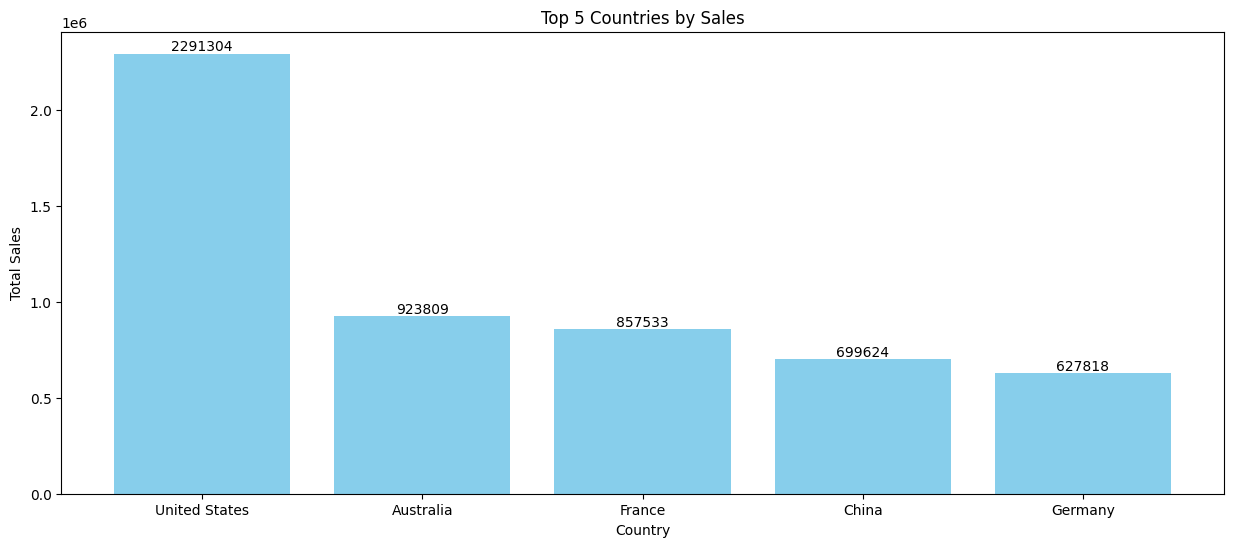

In [13]:
#Grouping
Sales = df.groupby(['Country'], as_index = False)['Sales'].sum().sort_values (by = 'Sales', ascending = False).head(5)
#adjust the size
plt.figure(figsize=(15, 6))

a = plt.bar(Sales['Country'], Sales['Sales'], color = 'skyblue')

# Adding data labels
plt.bar_label(a, fmt='%.0f')

plt.title('Top 5 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
#display data
plt.show()

In [14]:
#The graph above shows the top 5 countries with the highest sales. The United States leads in sales within the Global Superstore market.

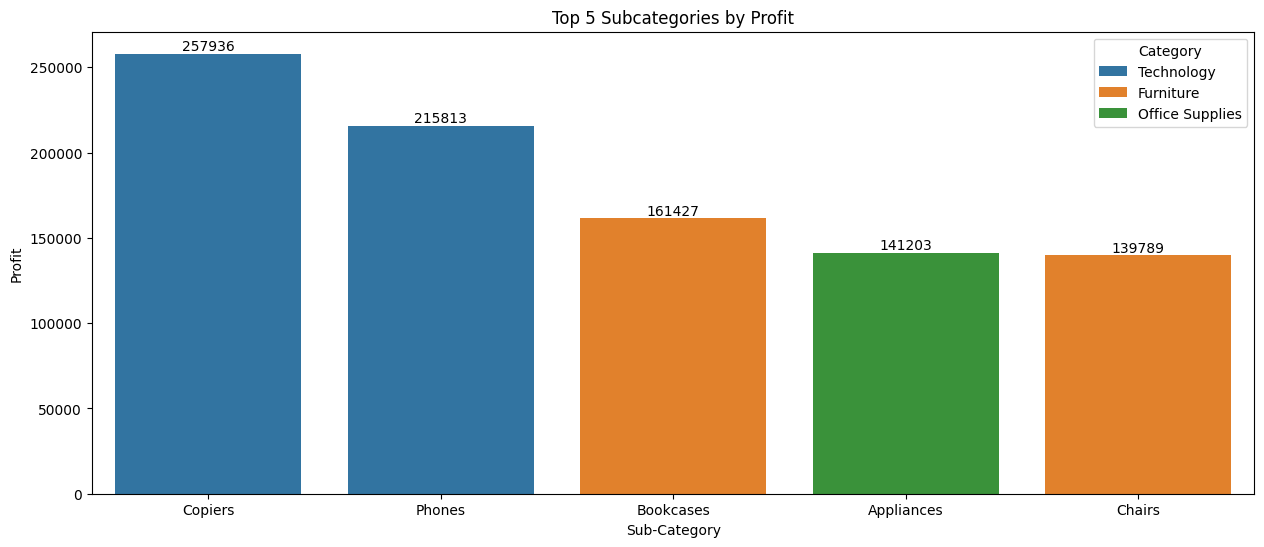

In [15]:
# Grouping data and getting the top 5 subcategories by profit
Sales = df.groupby(['Category', 'Sub-Category'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(5)

plt.figure(figsize=(15, 6))

# Creating the bar plot with different colors for each Category
a = sea.barplot(x='Sub-Category', y='Profit', hue='Category', data=Sales)

# Adding data labels to the bars
for container in a.containers:
    a.bar_label(container, fmt='%.0f')

# Setting the title and labels for the axes
plt.title('Top 5 Subcategories by Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

# Displaying the legend
plt.legend(title='Category')

# Displaying the plot
plt.show()


In [16]:
#The graph above shows the top 5 categories and subcategories with the highest profit. "Copiers" ranks as the highest profit-generating subcategory among them. In conclusion, the majority of the profit comes from the Technology category.

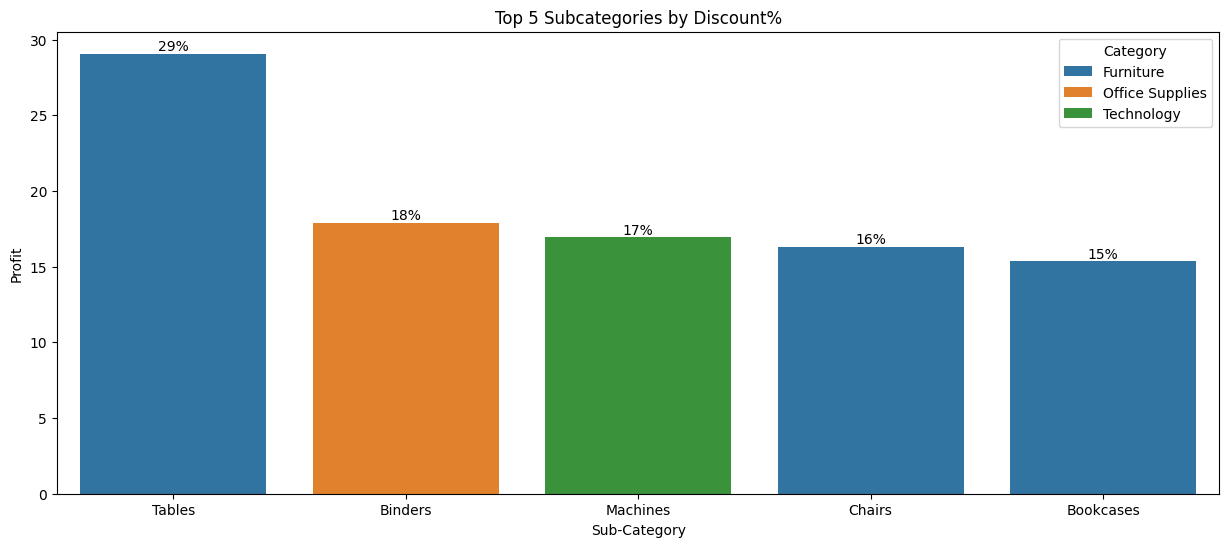

In [17]:
# Grouping data and getting the top 5 subcategories by Discount%
Sales = df.groupby(['Category', 'Sub-Category'], as_index=False)['Discount %'].mean().sort_values(by='Discount %', ascending=False).head(5)

plt.figure(figsize=(15, 6))

# Creating the bar plot with different colors for each Category
a = sea.barplot(x='Sub-Category', y='Discount %', hue='Category', data=Sales)

# Adding data labels to the bars
for container in a.containers:
    a.bar_label(container, fmt='%.0f%%')

# Setting the title and labels for the axes
plt.title('Top 5 Subcategories by Discount%')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

# Displaying the legend
plt.legend(title='Category')

# Displaying the plot
plt.show()

In [18]:
#The graph above displays the top 5 subcategories by discount percentage. Among these, the Tables subcategory, which falls under Furniture, offers the highest overall discount in the global market.

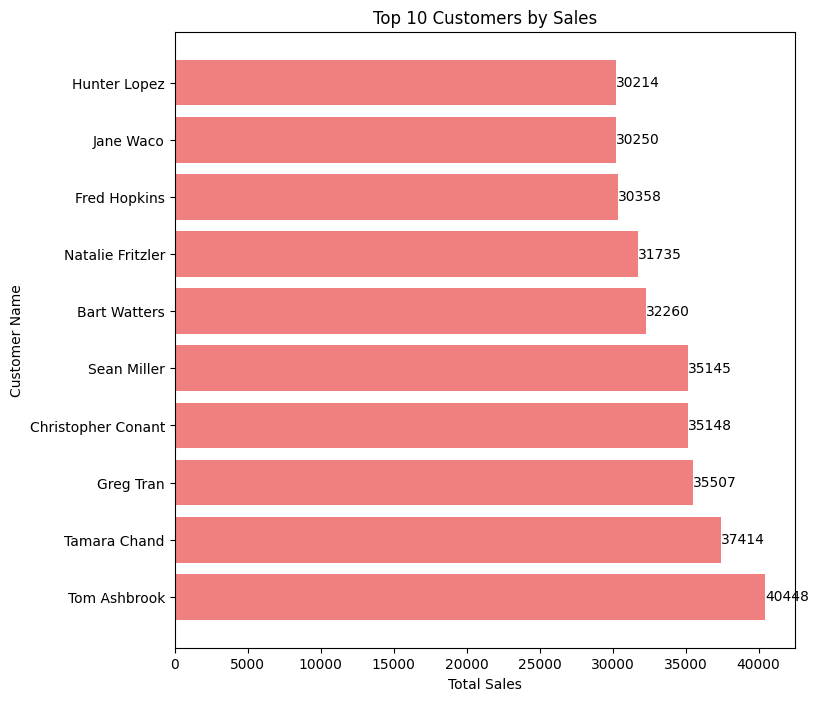

In [19]:

# Grouping sales data
Sales = df.groupby(['Customer Name'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

# Adjust the size
plt.figure(figsize=(8, 8))

# Creating a horizontal bar plot
a = plt.barh(Sales['Customer Name'], Sales['Sales'], color='lightcoral')

# Adding data labels
plt.bar_label(a, fmt='%.0f', label_type='edge')

# Setting the title and labels for the axes
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')

# Displaying the plot
plt.show()


In [20]:
#The graph above displays the most frequent users with the highest sales. Tom Ashbrook is the top customer for this service. Therefore, we should consider providing gift cards or coupons to similar customers in the future.

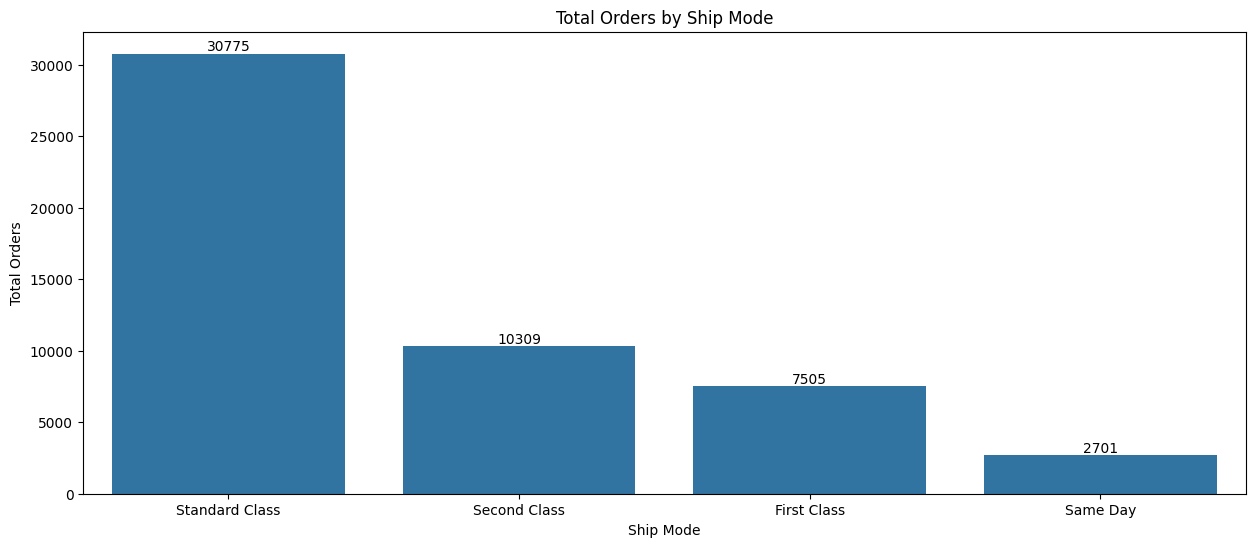

In [21]:

Sales = df.groupby(['Ship Mode'], as_index=False)['Order ID'].count().sort_values(by='Order ID', ascending=False)

plt.figure(figsize=(15, 6))

a = sea.barplot(x='Ship Mode', y='Order ID', data=Sales)

# Adding data labels to the bars
for container in a.containers:
    a.bar_label(container, fmt='%.0f')

# Setting the title and labels for the axes
plt.title('Total Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Orders')


# Displaying the plot
plt.show()

In [22]:
#The graph above shows the orders generated for each shipping mode. It indicates that the Standard Class is the most preferred shipping option.